In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My\ Drive/Colab\ Notebooks/Research \Models/Kameris \Models

/content/drive/My Drive/Colab Notebooks/Research Models/Kameris Models


In [3]:
import numpy as np
import os
import sys
import pickle
from helpers import getStats, plotDict, genome2tabInt,plot_confusion_matrix, kmer_count, build_pipeline, plot_confusion_matrix 
from sklearn.preprocessing import normalize
from scipy.spatial import distance
import json 
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random
from itertools import product
from itertools import product

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.preprocessing import StandardScaler



Using TensorFlow backend.


## Load Dengue data


In [7]:
TrainDataFile = '../data/Dengue/train.p'
train = pickle.load(open(TrainDataFile, "rb"))
unique_labels = list(set(map(lambda x: x[0], train)))


TestDataFile = '../data/Dengue/test.p'
test = pickle.load(open(TestDataFile, "rb"))

train.extend(test) #Add the test files to plot the whole dataset.
diTrain = getStats(train)

# Select the minimun amount of elements per class
minimum = 25

# Create Labels for Classes
diLabels = {}
classId = 0;
numClasses = len(unique_labels)
i=0
while i < len(train):
    if diTrain[train[i][0]] < minimum: 
      train.pop(i)
    else: 
        i+=1

#get some stats about the dataset and build the histogram
diDengue = getStats(train)
# plotDict(diTrain, 'train.png','Dengue')
# print(diTrain)

-----------some stats: ------------
total num of classes:  4
total num of samples:  5079
max genome length:  11195
occurences: 
1        =>     2102
2        =>     1581
4        =>      367
3        =>     1029
-----------------------------------
-----------some stats: ------------
total num of classes:  4
total num of samples:  5079
max genome length:  11195
occurences: 
1        =>     2102
2        =>     1581
4        =>      367
3        =>     1029
-----------------------------------


## Load HIV Dataset

In [8]:
TrainDataFile = '../data/HIV/train.p'
train = pickle.load(open(TrainDataFile, "rb"))
unique_labels = list(set(map(lambda x: x[0], train)))


TestDataFile = '../data/HIV/test.p'
test = pickle.load(open(TestDataFile, "rb"))

train.extend(test) #Add the test files to plot the whole dataset.
diTrain = getStats(train)

# Select the minimun amount of elements per class
minimum = 25

# Create Labels for Classes
diLabels = {}
classId = 0;
numClasses = len(unique_labels)
i=0
while i < len(train):
    if diTrain[train[i][0]] < minimum: 
      train.pop(i)
    else: 
        i+=1

#get some stats about the dataset and build the histogram
diHIV = getStats(train)
# plotDict(diTrain, 'train.png','Dengue')
# print(diTrain)

-----------some stats: ------------
total num of classes:  36
total num of samples:  7167
max genome length:  24307
occurences: 
D        =>       83
11_cpx   =>       24
01_AE    =>      884
63_02A   =>       11
01B      =>      105
02_AG    =>      136
71_BF1   =>       13
BC       =>       89
U        =>       20
A1D      =>       96
BF1      =>      145
22_01A1  =>       18
O        =>       53
07_BC    =>       41
A1CD     =>       24
02A      =>       13
CD       =>       61
0107     =>       23
01C      =>       10
F1       =>       64
35_AD    =>       22
B        =>     3104
A1       =>      313
42_BF    =>       17
14_BG    =>       13
A1C      =>      111
01BC     =>       25
N        =>       11
A6       =>       66
06_cpx   =>       14
G        =>       87
BG       =>       12
C        =>     1387
02A1     =>       25
02G      =>       12
08_BC    =>       35
-----------------------------------
-----------some stats: ------------
total num of classes:  20
total num of samp

## Load HCV Dataset

In [9]:
TrainDataFile = '../data/HCV/train.p'
train = pickle.load(open(TrainDataFile, "rb"))
unique_labels = list(set(map(lambda x: x[0], train)))


TestDataFile = '../data/HCV/test.p'
test = pickle.load(open(TestDataFile, "rb"))

train.extend(test) #Add the test files to plot the whole dataset.
diTrain = getStats(train)

# Select the minimun amount of elements per class
minimum = 20

# Create Labels for Classes
diLabels = {}
classId = 0;
numClasses = len(unique_labels)
i=0
while i < len(train):
    if diTrain[train[i][0]] < minimum: 
      train.pop(i)
    else: 
        i+=1

#get some stats about the dataset and build the histogram
diHCV = getStats(train)
# plotDict(diTrain, 'train.png','Dengue')
# print(diTrain)

-----------some stats: ------------
total num of classes:  9
total num of samples:  1869
max genome length:  24751
occurences: 
3a       =>       50
1b       =>      508
4a       =>       18
5a       =>       10
2a       =>       39
6a       =>       21
1a       =>     1105
2        =>       15
2b       =>      103
-----------------------------------
-----------some stats: ------------
total num of classes:  6
total num of samples:  1826
max genome length:  24751
occurences: 
3a       =>       50
1b       =>      508
2a       =>       39
6a       =>       21
1a       =>     1105
2b       =>      103
-----------------------------------


## Load HBV Dataset

In [12]:
TrainDataFile = '../data/HBV/train.p'
train = pickle.load(open(TrainDataFile, "rb"))
unique_labels = list(set(map(lambda x: x[0], train)))


TestDataFile = '../data/HBV/test.p'
test = pickle.load(open(TestDataFile, "rb"))

train.extend(test) #Add the test files to plot the whole dataset.
diTrain = getStats(train)

# Select the minimun amount of elements per class
minimum = 20

# Create Labels for Classes
diLabels = {}
classId = 0;
numClasses = len(unique_labels)
i=0
while i < len(train):
    if diTrain[train[i][0]] < minimum: 
      train.pop(i)
    else: 
        i+=1

#get some stats about the dataset and build the histogram
diHBV = getStats(train)
# plotDict(diTrain, 'train.png','Dengue')
# print(diTrain)

-----------some stats: ------------
total num of classes:  13
total num of samples:  6824
max genome length:  3257
occurences: 
D        =>      944
RF-DE    =>      209
F        =>      246
B        =>     1683
RF-DC    =>      128
RF-BC    =>       23
E        =>      255
H        =>       26
G        =>       39
C        =>     2130
RF-CB    =>      311
A        =>      815
RF-GC    =>       15
-----------------------------------
-----------some stats: ------------
total num of classes:  12
total num of samples:  6809
max genome length:  3257
occurences: 
D        =>      944
RF-DE    =>      209
F        =>      246
B        =>     1683
RF-DC    =>      128
RF-BC    =>       23
E        =>      255
H        =>       26
G        =>       39
C        =>     2130
RF-CB    =>      311
A        =>      815
-----------------------------------


## Plot the Dictionaries

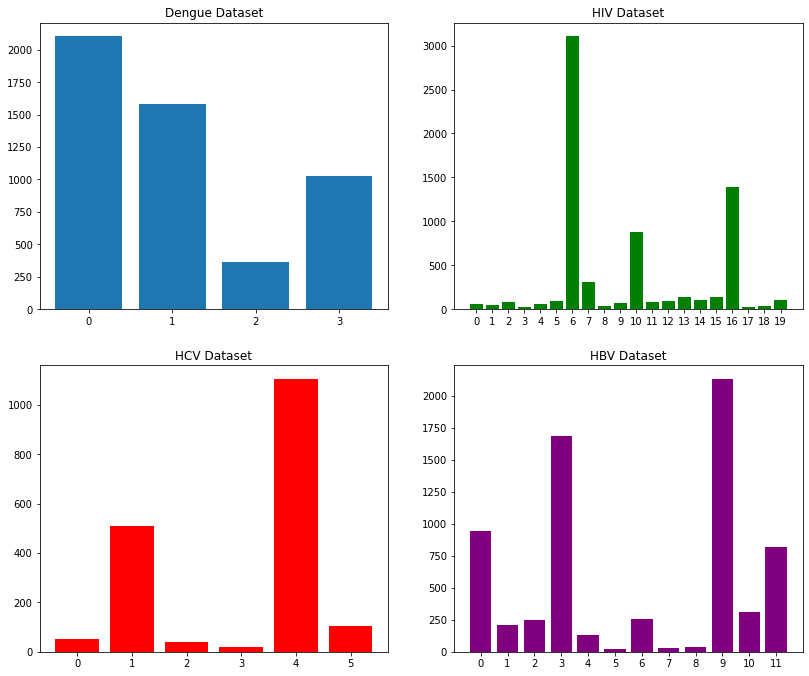

In [36]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,10)
fig.tight_layout(pad=3.5)

d = diDengue
ax[0][0].bar(range(len(d)), d.values(), align='center')
ax[0][0].set_xticks(range(len(d)))
a = ax[0][0].get_xticks().tolist()
a[1] = ':)'
#list(d.keys())
ax[0][0].set_title('Dengue Dataset')

d = diHIV
ax[0][1].bar(range(len(d)), d.values(), align='center', color = 'green')
ax[0][1].set_xticks(range(len(d)))
ax[0][1].set_title('HIV Dataset')

d = diHCV
ax[1][0].bar(range(len(d)), d.values(), align='center',color = 'red')
ax[1][0].set_xticks(range(len(d)))
ax[1][0].set_title('HCV Dataset')

d = diHBV
ax[1][1].bar(range(len(d)), d.values(), align='center',color = 'purple')
ax[1][1].set_xticks(range(len(d)))

ax[1][1].set_title('HBV Dataset')

plt.show()
